# **Frontier Technologies Learning Collaborative​**
## **Week 3: Classification**

### **Question: What kind of data more suitable for a classification task?**

**A)** Quantative Data

**B)** Continuous Data

**C)** Categorical Data

In [ ]:
C

### **Question: Which of the visual represent the Sigmoid Function? (A, B, C)**

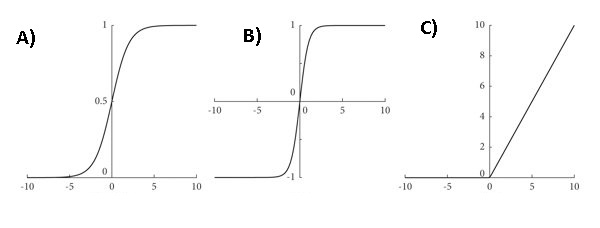

In [ ]:
A

### **Question: Please write sigmoid function that receives a value and returns the output after sigmoid function calculation**

**The sigmoid function:**

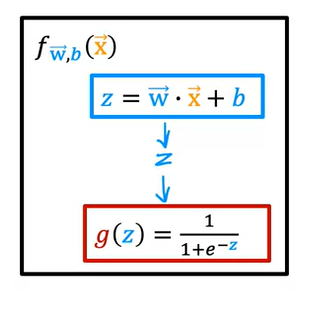

In [21]:
def sigmoid(z):

  # formula


  return  1 / (1 + math.exp(-z))

### **Question: Please visualize given sample dataset**

Expected output(please do not consider the colors or the theme of the sample visuals, main purpose is to visualize data points):



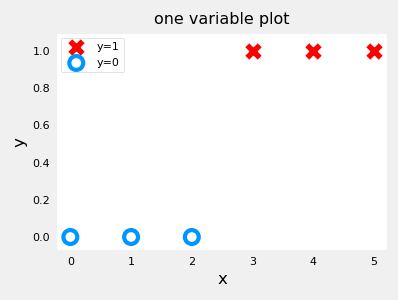

In [24]:
import numpy as np

In [25]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

NameError: name 'dlc' is not defined

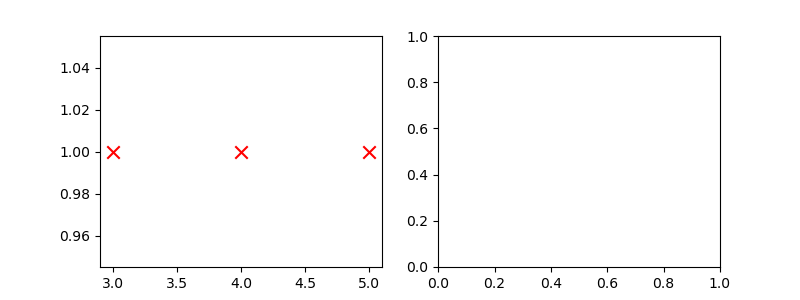

In [26]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

## **Classification Task: Finding smokers by body signals**

### **The dataset**

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

**Data shape: (55692, 27)**

*   **ID:** index
*   **gender**
*   **age:** 5-years gap
*   **height(cm)**
*   **weight(kg)**
*   **waist(cm):** Waist circumference length
*   **eyesight(left)**
*   **eyesight(right)**
*   **hearing(left)**
*   **hearing(right)**
*   **systolic:** Blood pressure
*   **relaxation:** Blood pressure
*   **fasting blood sugar**
*   **Cholesterol: **total
*   **triglyceride**
*   **HDL:** cholesterol type
*   **LDL:** cholesterol type
*   **hemoglobin**
*   **Urine protein**
*   **serum creatinine**
*   **AST:** glutamic oxaloacetic transaminase type
*   **ALT:** glutamic oxaloacetic transaminase type
*   **Gtp:** γ-GTP
*   **oral:** Oral Examination status
*   **dental caries**
*   **tartar:** tartar status
*   **smoking**

### **1. Import required packages**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### **2. Import dataset**

In [15]:
data = pd.read_csv('data/smoking.csv')


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


### **3. Explore dataset**

*   Info
*   Shape
*   Do  visualization on features, (i.e. gender distribution on a pie chart, or histograms on other kind of features)
*   Identify valuable features for ML training (observe correlations between smokers and not smokers based on the features)
*   Preapre the dataset for ML model (converting categorical values to numerical variables - labelencoding)

In [31]:
#Info and Shape
data.shape
#data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

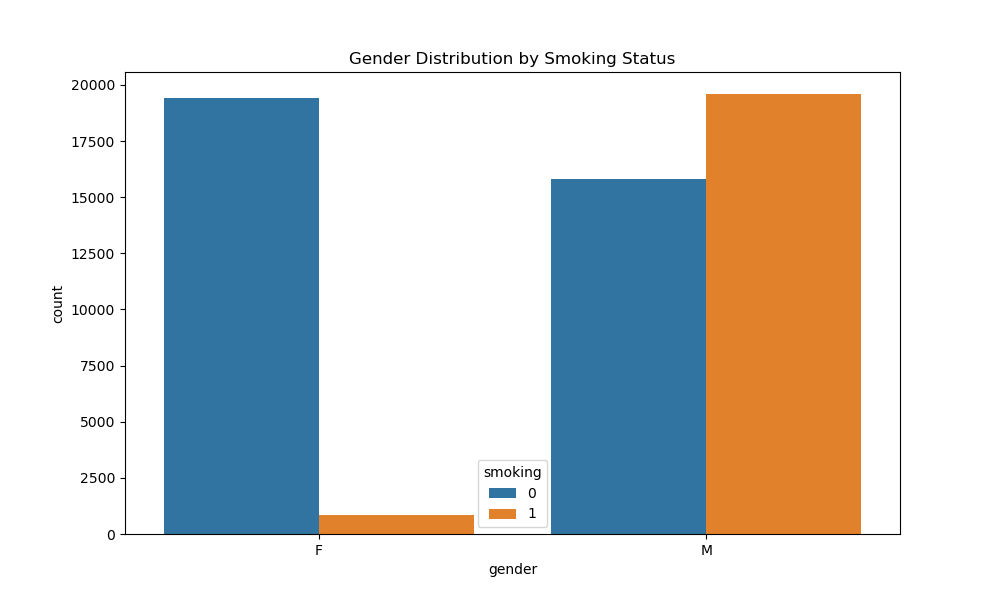

In [32]:
# Visualization 
#sns.pairplot(data)

plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='smoking', data=data)
plt.title("Gender Distribution by Smoking Status")
plt.show()


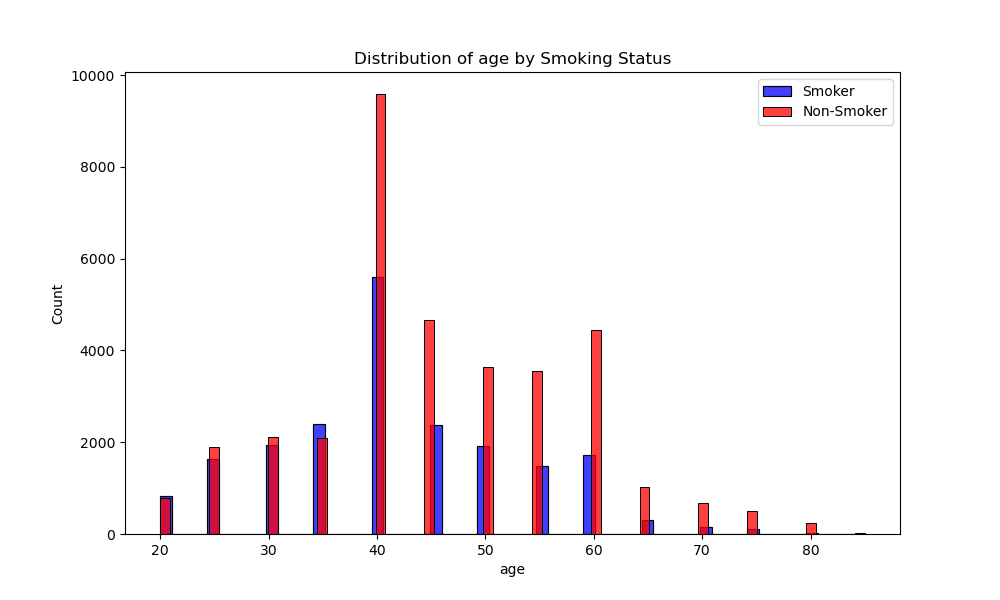

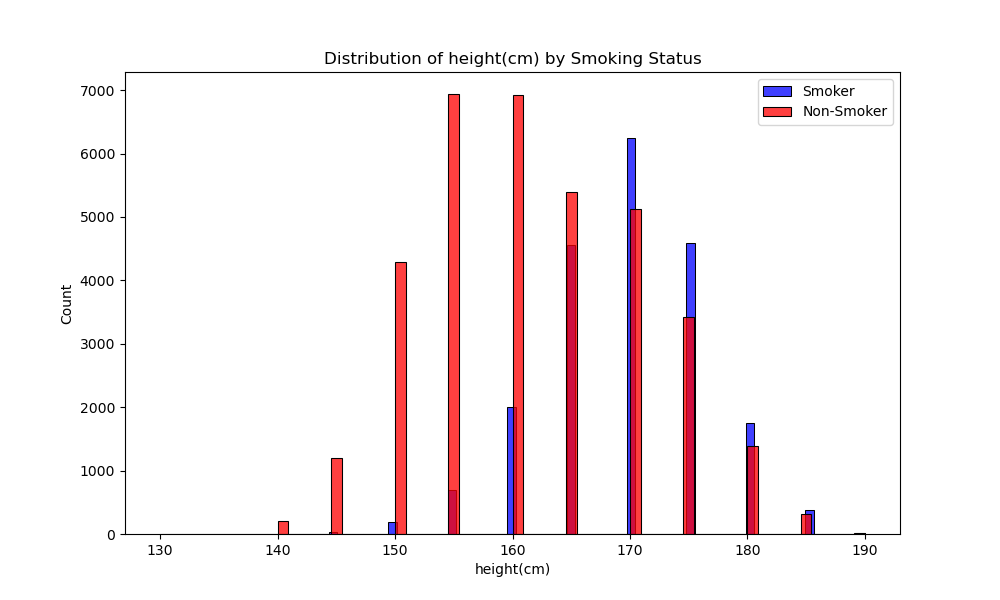

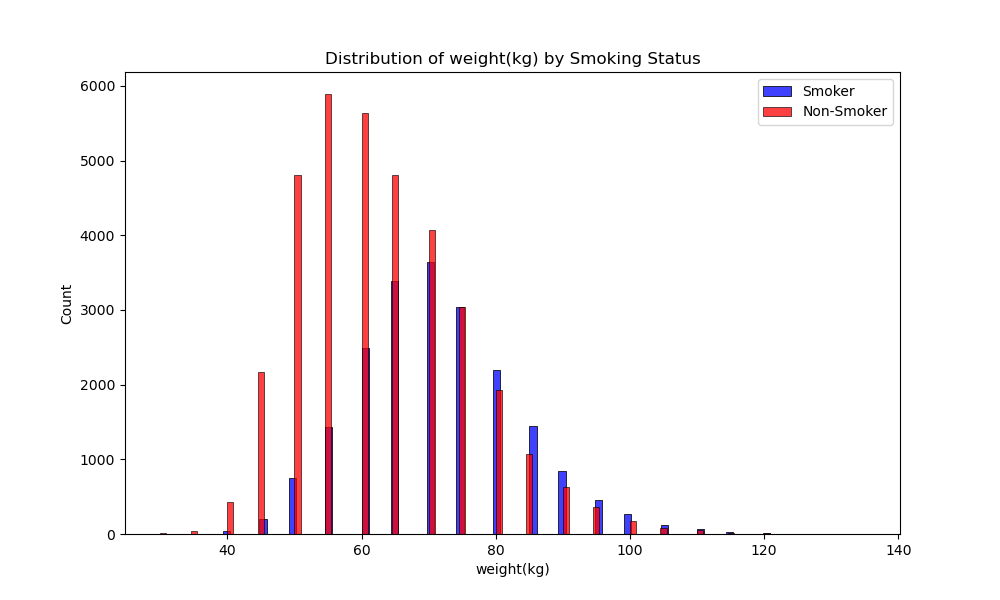

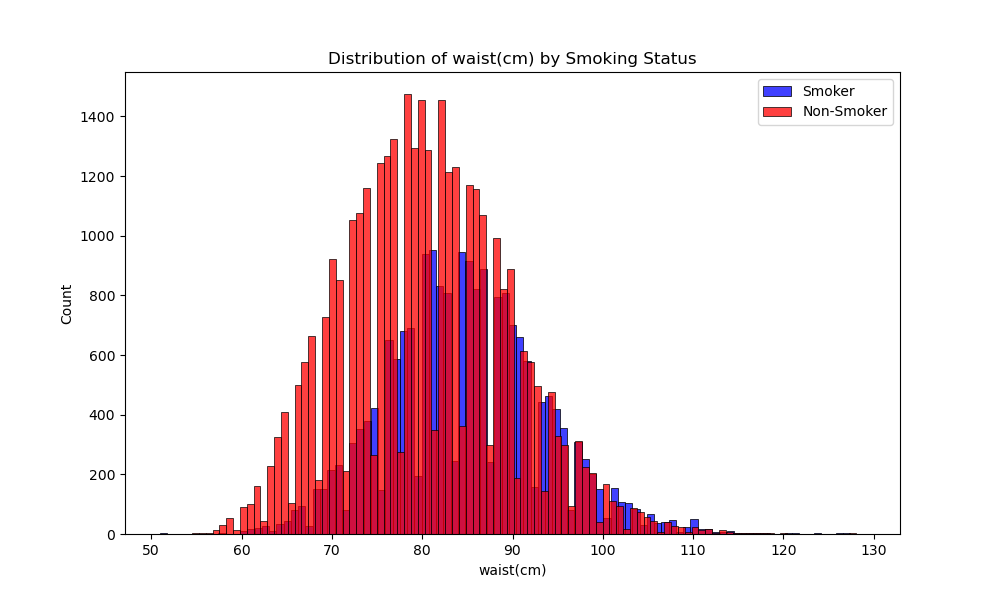

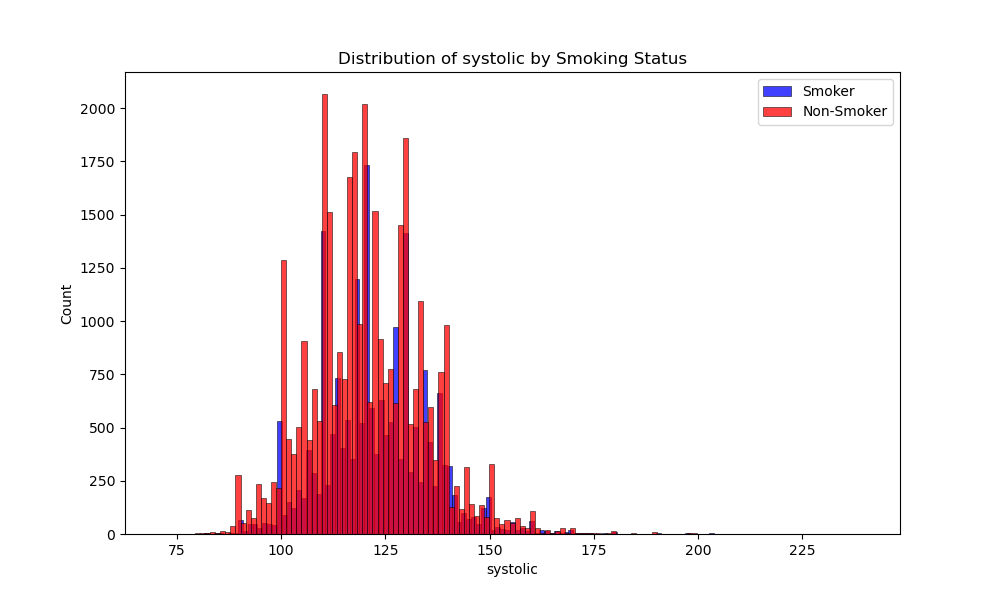

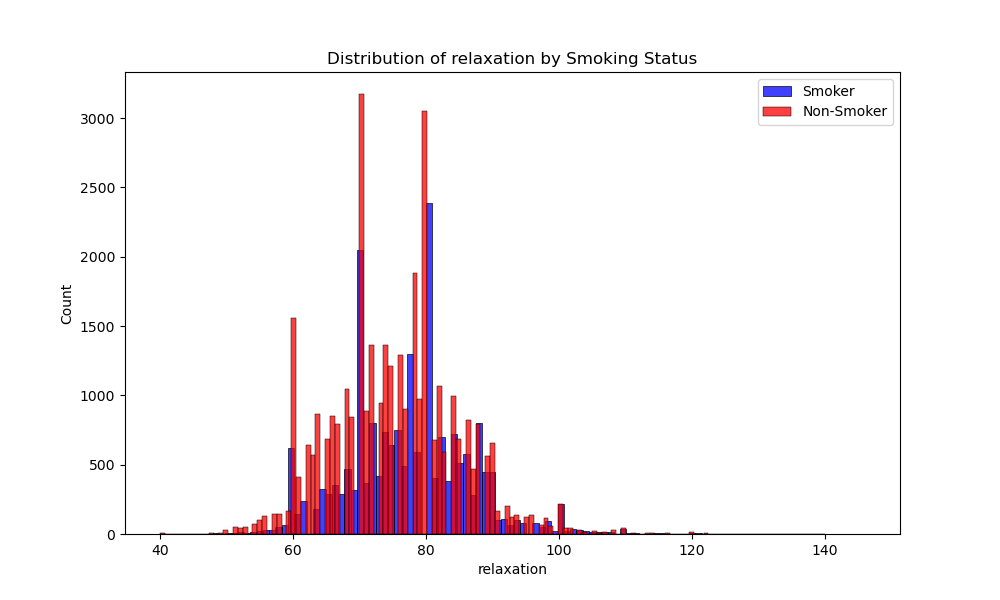

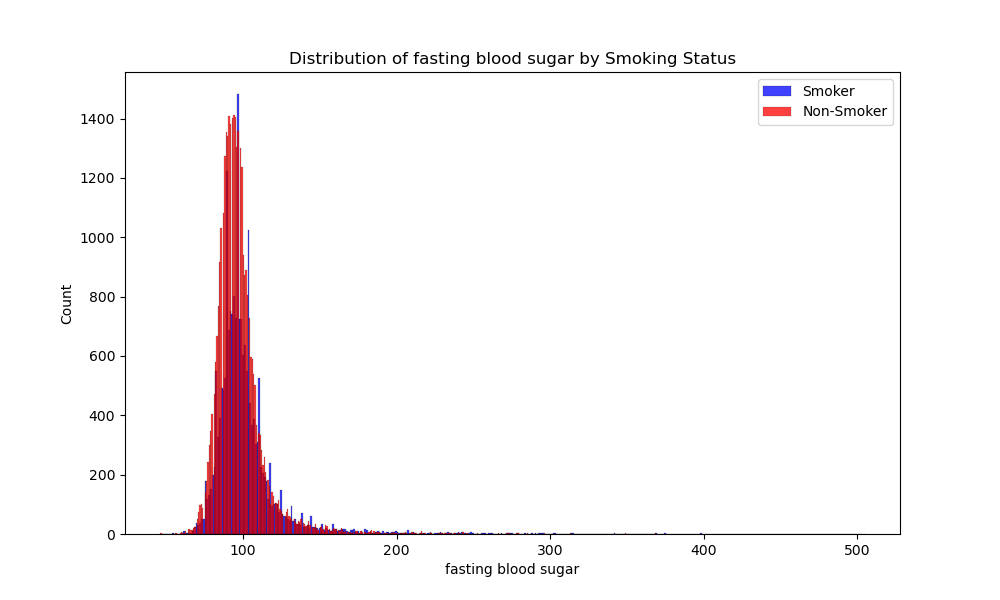

KeyError: 'Cholesterol: total'

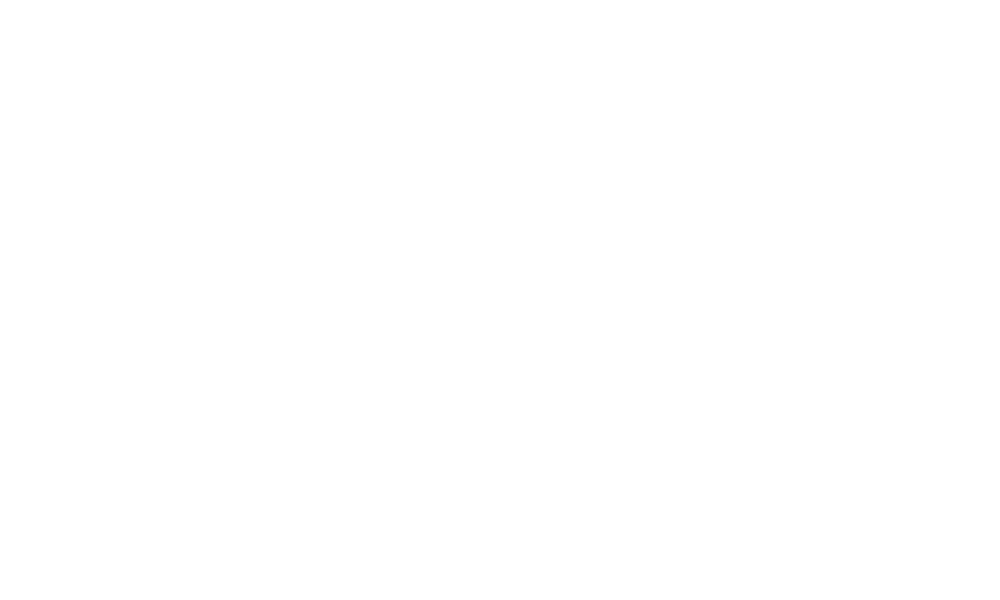

In [33]:
# Visualize the distribution of numerical features
numerical_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol: total', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']
smoker_data = data[data['smoking'] == 1]
non_smoker_data = data[data['smoking'] == 0]
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(smoker_data[feature], color='blue', label='Smoker')
    sns.histplot(non_smoker_data[feature], color='red', label='Non-Smoker')
    plt.legend()
    plt.title(f"Distribution of {feature} by Smoking Status")
    plt.show()

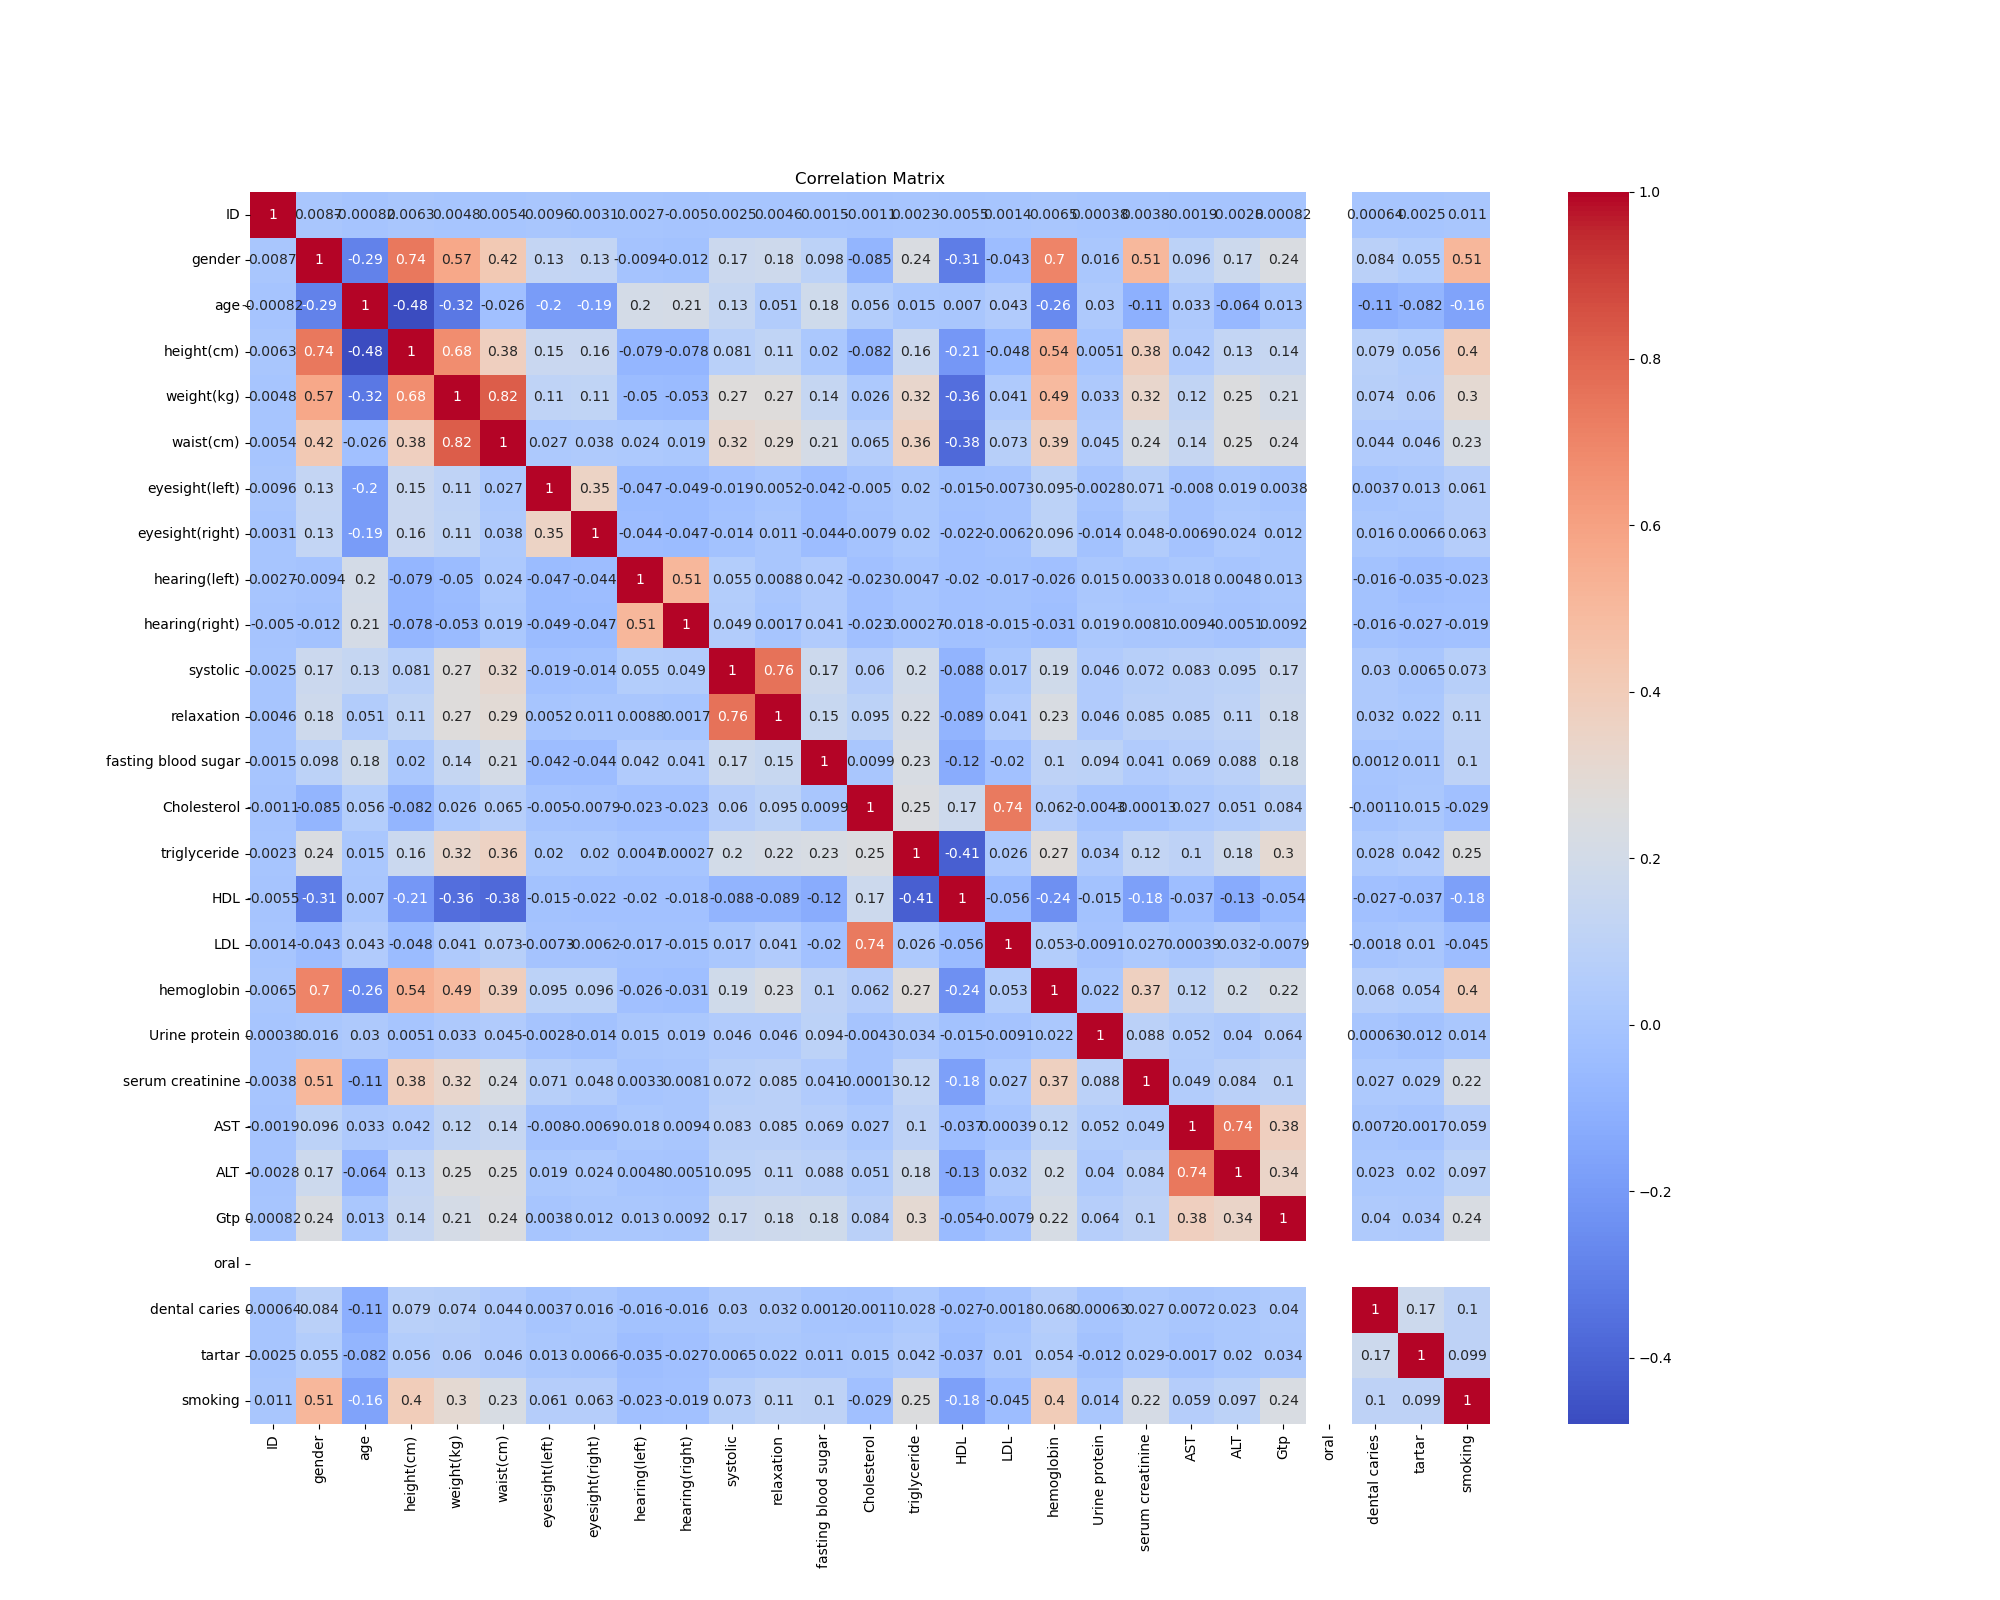

In [41]:
# Identify valuable features for ML training
corr = data.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [35]:
# Prepare the dataset for ML model
label_encoder = LabelEncoder()
categorical_features = ['gender', 'oral', 'dental caries', 'tartar']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [36]:
# Separate the features and target variable
X = data.drop(['smoking', 'ID'], axis=1)
y = data['smoking']

### **4. Build & Train Logistic Regression model (sklearn)**


*   Split the dataset into test and training sets (X_train, X_test, y_train, y_test)
*   Initiate the logistic regression model
*   Start training (you may also adjust parameters)




In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
# please do add other packages in need

In [42]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initiate the logistic regression model
logreg = LogisticRegression()

In [44]:
#Training 
logreg.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:

# Predict the test set labels
y_pred = logreg.predict(X_test)

### **5. Evaluate the LR model with the test dataset**

- Classification report

In [46]:
from sklearn.metrics import classification_report

# Classification report
target_names = ['Non-Smoker', 'Smoker']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Non-Smoker       0.74      0.82      0.78      7027
      Smoker       0.63      0.52      0.57      4112

    accuracy                           0.71     11139
   macro avg       0.69      0.67      0.67     11139
weighted avg       0.70      0.71      0.70     11139



### **6. Visualize the classification results**